<a href="https://colab.research.google.com/github/Tanjul5/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

First of all import all libraries

In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###Let's Mount the Drive and analyse the data..

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Hotel_book_df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [ ]:
Hotel_book_df.describe

<bound method NDFrame.describe of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...    

In [ ]:
#checking the top 10 rows in dataset
Hotel_book_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#checking last 10 rows in datasets
Hotel_book_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#check columns name
Hotel_book_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
Hotel_book_df.shape

(119390, 32)

In [ ]:
Hotel_book_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# **Data Preprocessing**

In [ ]:
Hotel_book_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
Hotel_book_df.fillna(Hotel_book_df.mean())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,189.266735,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.000000,189.266735,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.000000,189.266735,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.000000,189.266735,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.000000,189.266735,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#Replacing NUll value with zero for convinience

Hotel_book_df.fillna(0, inplace=True)

In [ ]:
#check duplicate rows
duplicate_rows_df = Hotel_book_df[Hotel_book_df.duplicated()].shape

print(f"the no. of duplicate rows :" , duplicate_rows_df)

the no. of duplicate rows : (31994, 32)


In [ ]:
#drop duplicate values
df=Hotel_book_df.drop_duplicates()
df.shape

(87396, 32)

In [ ]:
Hotel_book_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Exploratory Data Analysis**

# **what is the count of each type of Hotels ?**

In [ ]:
hotel_list = Hotel_book_df['hotel'].value_counts()
hotel_list
hotel_count = Hotel_book_df['hotel'].value_counts().index
hotel_count

Index(['City Hotel', 'Resort Hotel'], dtype='object')

# *The dataset describes two types of hotels, City and Resort hotel*

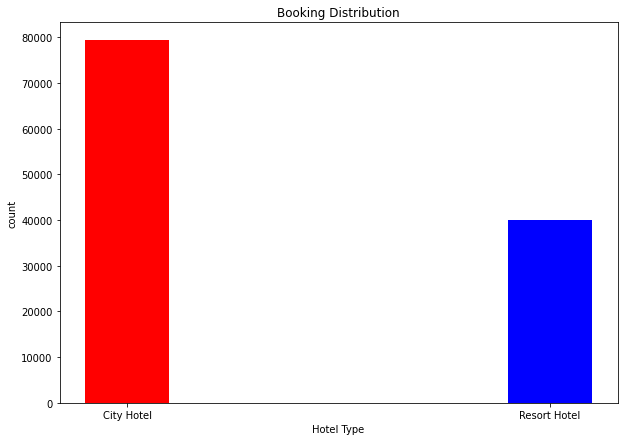

In [ ]:
# creating the bar graph
plt.figure(figsize = (10,7))
plt.bar(hotel_count, hotel_list, color =['red','blue'], width = 0.2)
plt.xlabel("Hotel Type")
plt.ylabel("count")
plt.title('Booking Distribution')
plt.show()

# *the maximum number of customers prefer to book city hotel than the resort hotel.*

In [ ]:
#Counts of booking
Hotel_book_df.groupby("hotel")["is_canceled"].count().rename_axis('Hotels').reset_index(name='Number of Visitors ')

,Hotels,Number of Visitors
0,City Hotel,79330
1,Resort Hotel,40060


# **Year wise Booking**

Text(0.5, 1.0, 'Booking per year')

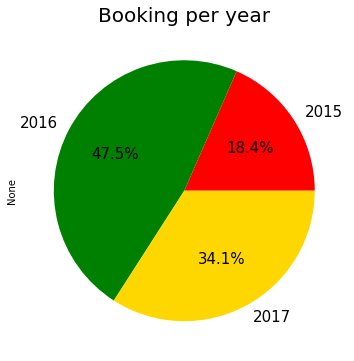

In [ ]:
bookper_year=Hotel_book_df.groupby('arrival_date_year').size().plot(kind='pie', fontsize=15, autopct='%.1f%%',  figsize=(6, 6), colors = [ 'red', 'green', 'gold'],textprops={'color':"black"}) 
plt.title('Booking per year',fontsize=20)


# **# Monthly wise booking all over the year in both hotals**

Text(0, 0.5, 'Count')

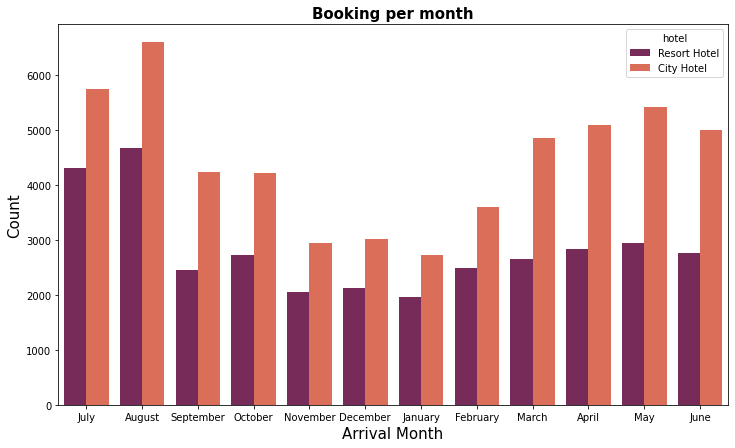

In [ ]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x= 'arrival_date_month',hue = 'hotel',data = df,palette= 'rocket')
plt.title ('Booking per month',weight = 'bold', size = 15)
plt.xlabel("Arrival Month",size = 15)
plt.ylabel('Count',size = 15)

Text(0.5, 0, 'Arrival Month')

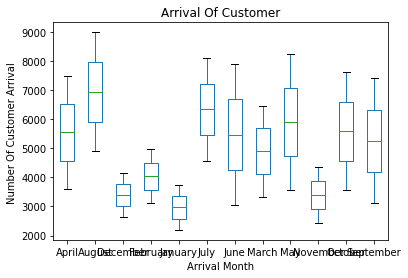

In [ ]:
Hotel_book_df.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].size().unstack().plot(kind="box")
plt.title('Arrival Of Customer')
plt.ylabel('Number Of Customer Arrival ')
plt.xlabel('Arrival Month')

# *# •	August has maximum bookings with 700 reservation counts*

## **Booking count country wise**

In [ ]:
top_10_countries = Hotel_book_df[Hotel_book_df['is_canceled']==0]['country'].value_counts()[:10]
top_10_countries

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
IRL     2543
ITA     2433
BEL     1868
NLD     1717
USA     1596
Name: country, dtype: int64

Text(0, 0.5, ' Booking Count')

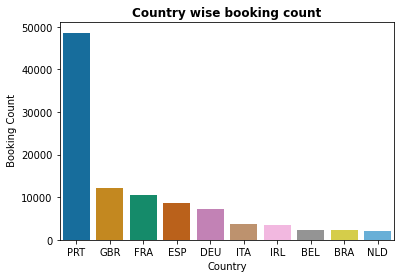

In [ ]:
sns.countplot(x='country', data=Hotel_book_df,order=pd.value_counts(Hotel_book_df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Country wise booking count', weight='bold')
plt.xlabel('Country')
plt.ylabel(' Booking Count')

# *Portugal is the country with highest bookings, Resort hotel is the most preferred hotel by top 10 countries.*

# **Booking status in  the Hospitality industry**

[Text(0.5, 1.0, 'The Booking Status in the Hospitality Industry')]

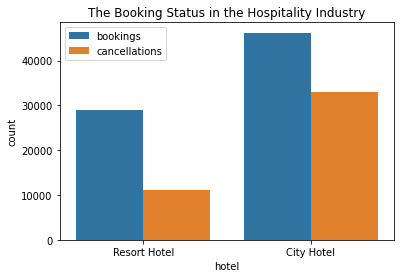

In [ ]:
# here the successful bookings are represented by 0 and cancellations are represented by 1.
b_ch = sns.countplot(data=Hotel_book_df, x='hotel', hue='is_canceled')
b_ch.legend(['bookings','cancellations'])
b_ch.set(title='The Booking Status in the Hospitality Industry')



# **CANCELLATION ANALYSIS**

# **Cancellation in both hotels**

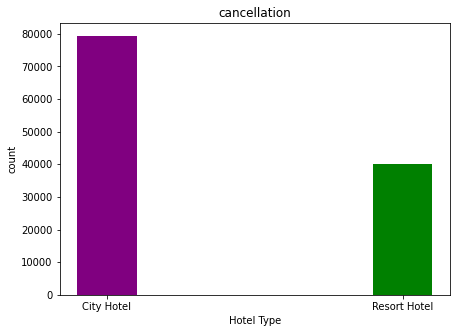

In [ ]:
plt.figure(figsize = (7,5))
plt.bar(hotel_count, hotel_list, color =['purple','green'], width = 0.2)
plt.xlabel("Hotel Type")
plt.ylabel("count")
plt.title('cancellation')
plt.show()

# *city hotel has more cancellaion than resort hotel.*

# **Booking Vs Cancellation**

Text(0, 0.5, 'No. of Bookings(%)')

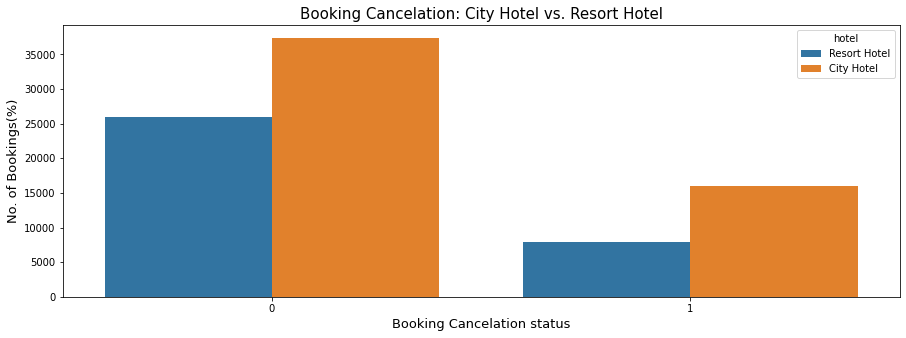

In [ ]:
plt.rcParams['figure.figsize']= (15,5)
sns.countplot(data = df, x = 'is_canceled', hue = 'hotel')
plt.title('Booking Cancelation: City Hotel vs. Resort Hotel',fontsize=15)
plt.xlabel('Booking Cancelation status', fontsize=13)
plt.ylabel('No. of Bookings(%)', fontsize=13)

*# 0 - not cancelled, 1- is cancelled*
# *the total bookings are more in city hotels but the rate of confirmed bookings is clearly more in resort hotels.*

# **## cancellation Vs repetaed guest**

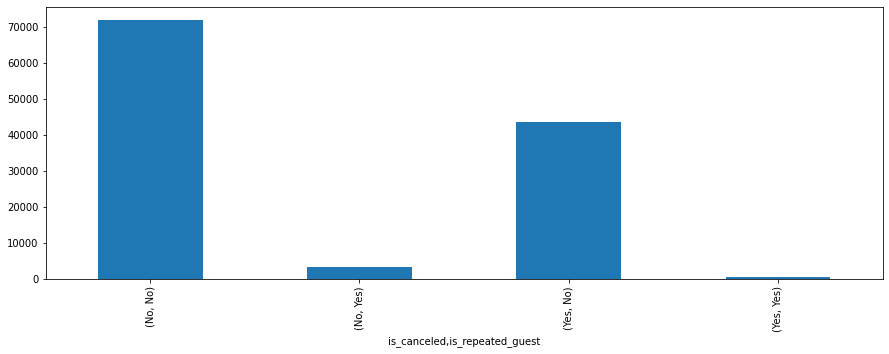

In [ ]:
Hotel_book_df["is_canceled"].replace([1,0],['Yes','No'],inplace=True)
Hotel_book_df["is_repeated_guest"].replace([1,0],['Yes','No'], inplace=True)
df=Hotel_book_df.groupby(['is_canceled','is_repeated_guest']).size()
df.plot(kind='bar')

# *The number of repeated guests are low, but the repeated guests have a very low rate of cancelations.*

# **Cancellation Vs leadtime**

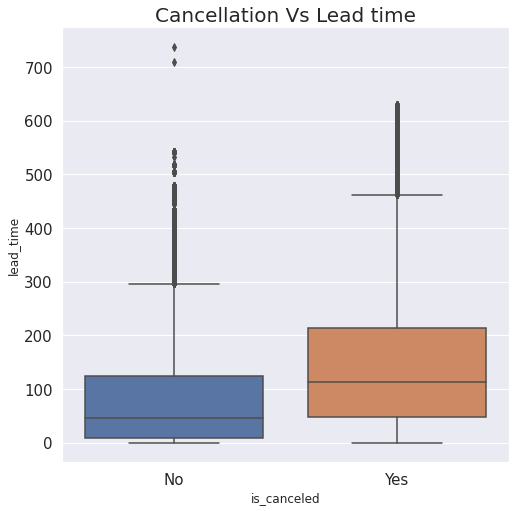

In [ ]:
# depicting groups of Cancellation through their quartiles using boxplot
# 0 - not cancelled, 1- is cancelled
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Cancellation Vs Lead time", fontsize=20)
sns.boxplot(x='is_canceled',y='lead_time',data=Hotel_book_df)

# *We can notice that the cancellation rate was lower when the customers were allowed for changes.*

# **Previous cancellation**

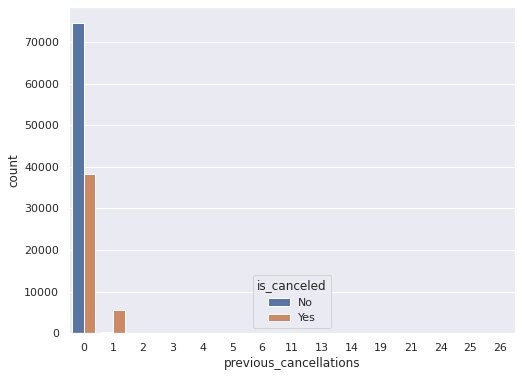

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Hotel_book_df, x='previous_cancellations', hue='is_canceled')

# *Maximum customers have 0 previous cancellations. They are less likely to cancel the current booking. However, customers who have cancelled once earlier are more likely to cancel the current booking. This also matches with the positive correlation between previous_cancellations and is_cancelled*

# **correlation between the "is_canceled" variable and other variables of the Dataframe**

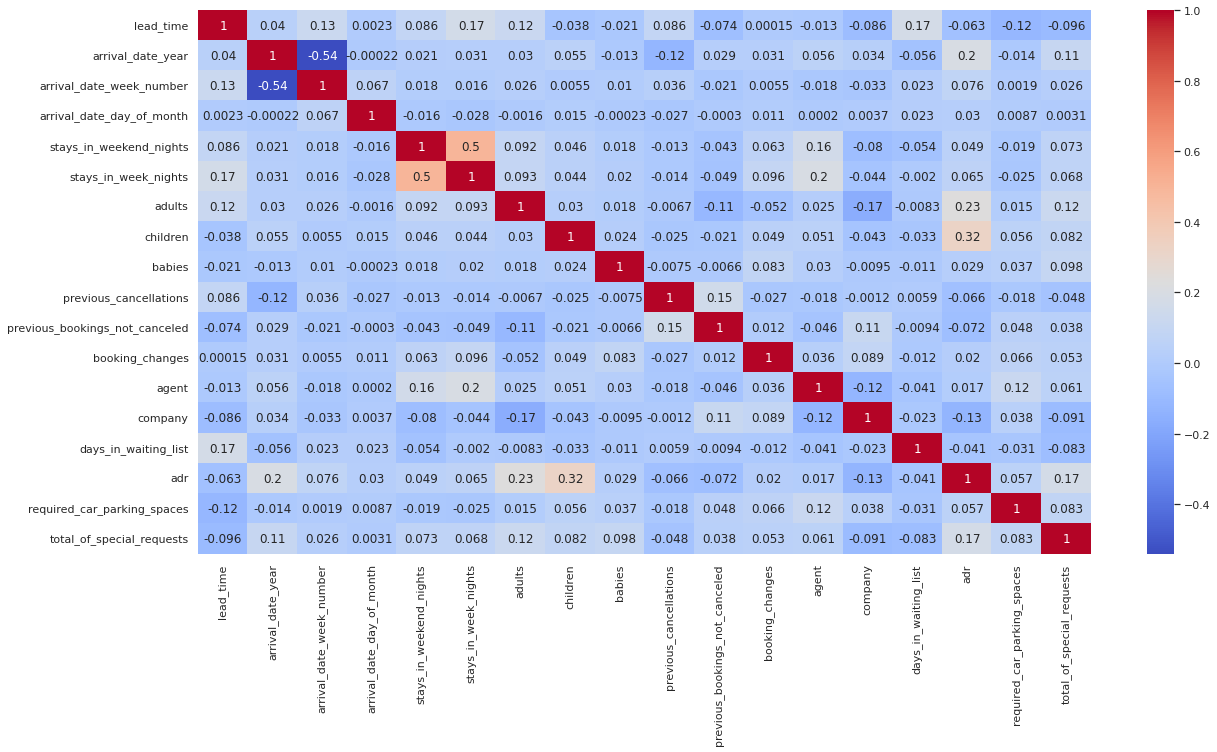

In [ ]:
plt.figure(figsize=(20,10))
c=Hotel_book_df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)

#•	*lead_time was the variable having some significant level positive correlation 0.17 with days_in_waiting_list & stays_in_week_nights then 0.08 with previous_cancellations*.

# **Reserved and Assigned room**

Text(0, 0.5, 'Counts')

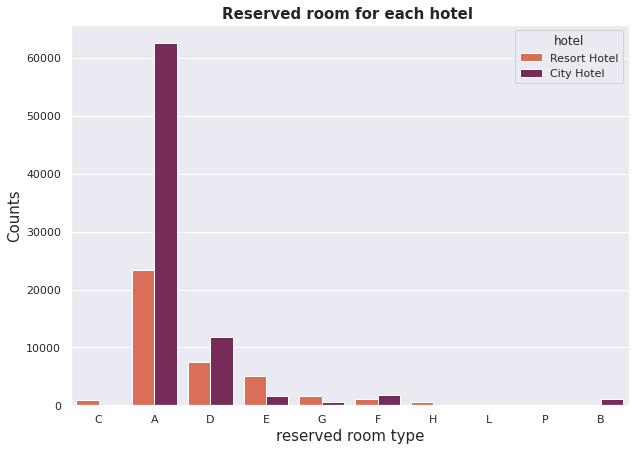

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))    
sns.countplot(x ='reserved_room_type', data = Hotel_book_df, hue = "hotel", palette = 'rocket_r')
plt.title('Reserved room for each hotel ', weight='bold',size = 15)
plt.xlabel('reserved room type',size = 15)
plt.ylabel('Counts',size = 15)

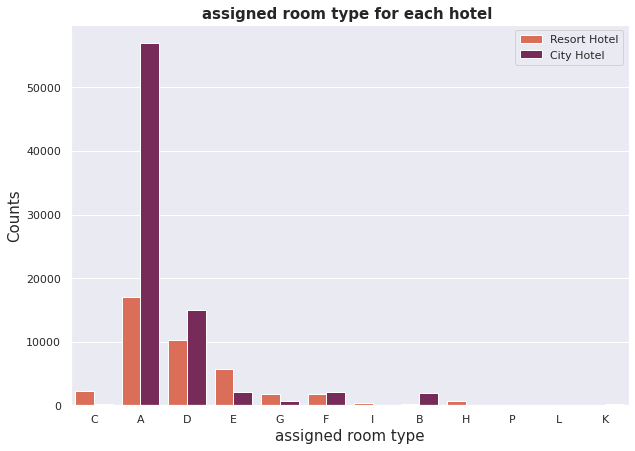

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))    
sns.countplot(x ='assigned_room_type', data = Hotel_book_df, hue = "hotel", palette = 'rocket_r')
plt.title('assigned room type for each hotel ', weight='bold',size = 15)
plt.xlabel('assigned room type',size = 15)
plt.ylabel('Counts',size = 15)
plt.legend(loc='upper right')

# *The graph shows that maximum number of customers get assigned room which they reserved.*

# **MEAL TYPES**

Text(0, 0.5, 'Count')

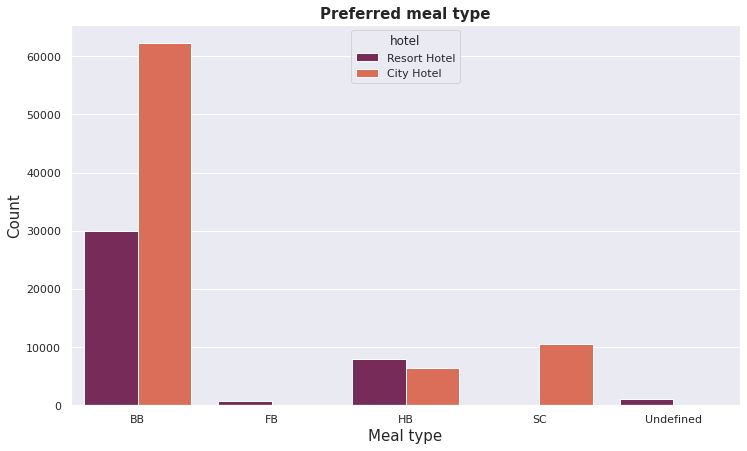

In [ ]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x= 'meal',hue = 'hotel',data = Hotel_book_df,palette= 'rocket')
plt.title ('Preferred meal type',weight = 'bold', size = 15)
plt.xlabel("Meal type",size = 15)
plt.ylabel('Count',size = 15)

# *Conclusion - Most of the guests prefer Bed and Breakfast(BB) meal type and after that guests prefer Half board(HB).Very few prefer to take Full board(FB).*

# **MARKET SEGMENT**

# Which market segment has the least number of days in the waiting list ?

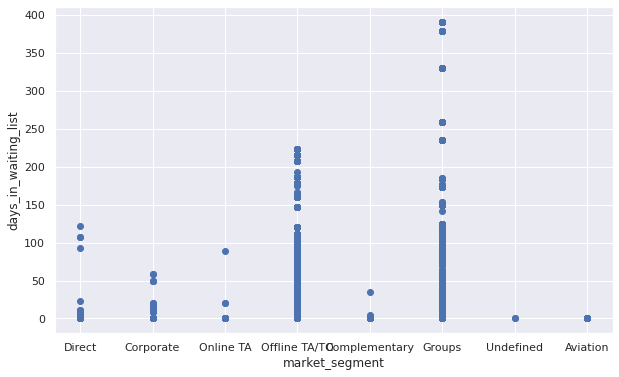

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(Hotel_book_df['market_segment'], Hotel_book_df['days_in_waiting_list'])
ax.set_xlabel('market_segment')
ax.set_ylabel('days_in_waiting_list')
plt.show()

# *customers of the groups market segment has the maximum waiting time nearly about 400 days.*

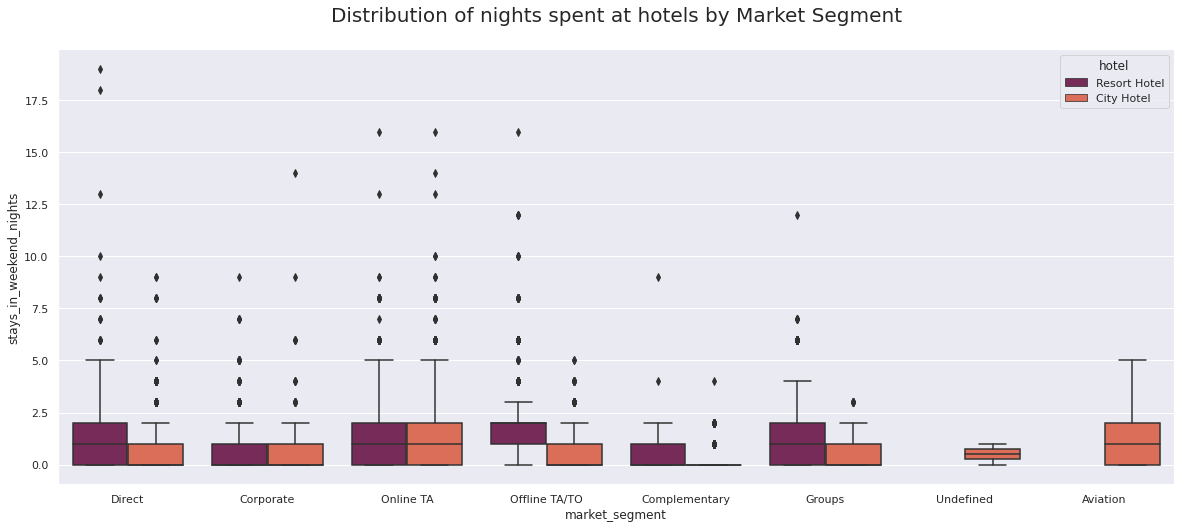

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Distribution of nights spent at hotels by Market Segment\n',fontsize=20)
sns.boxplot(x='market_segment',y='stays_in_weekend_nights',data=Hotel_book_df, hue='hotel',palette='rocket')
plt.xlabel('market_segment')
plt.ylabel('stays_in_weekend_nights')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


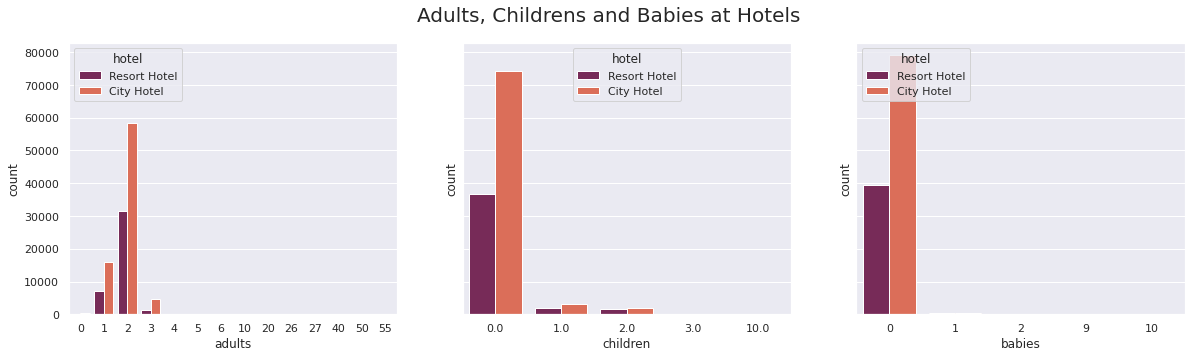

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(20,5),sharey=True)

sns.countplot('adults',data=Hotel_book_df,hue='hotel',ax=axes[0],palette='rocket')
sns.countplot('children',data=Hotel_book_df,hue='hotel',ax=axes[1],palette='rocket')
sns.countplot('babies',data=Hotel_book_df,hue='hotel',ax=axes[2],palette='rocket')
plt.suptitle('Adults, Childrens and Babies at Hotels\n',fontsize=20)
plt.show()

# *•	City Hotel has more counts for children, babies, and adults than the resort hotel.* 

# **Deposits - Deposit Type & variaiton by type of customers**

Deposits - Deposit Type

In [ ]:
 deposit_types = Hotel_book_df.deposit_type.value_counts()
deposit_types

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Text(0.5, 0, 'Deposit type')

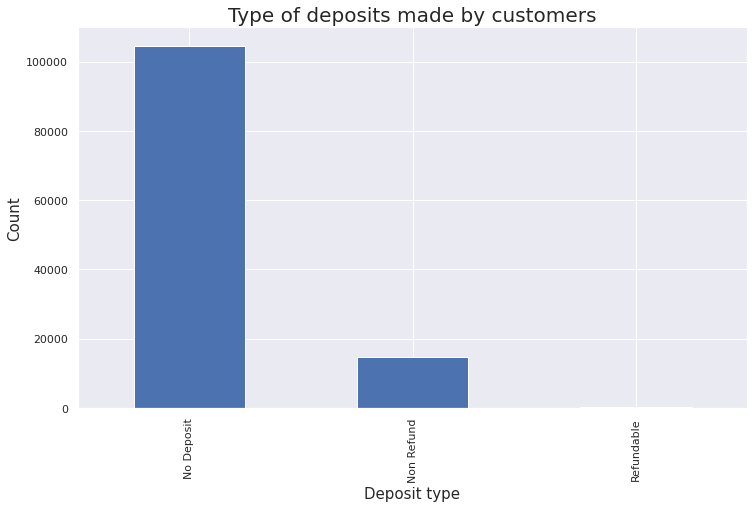

In [ ]:
plt.figure(figsize=(12,7))
deposit_types.plot(kind='bar')
plt.title('Type of deposits made by customers',fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Deposit type',fontsize=15)

# *Most customers prefer to book a no deposit compared to Non Refund and Refundable. But comparing Non Refund and Refundable, customer preferred Non Refund.*

# Deposits - Variation by type of customers

In [ ]:
deposittype_customertype_relation = Hotel_book_df.groupby(["deposit_type"])["customer_type"].value_counts()
deposittype_customertype_relation

deposit_type  customer_type  
No Deposit    Transient          76684
              Transient-Party    23858
              Contract            3530
              Group                569
Non Refund    Transient          12909
              Transient-Party     1134
              Contract             544
Refundable    Transient-Party      132
              Transient             20
              Group                  8
              Contract               2
Name: customer_type, dtype: int64

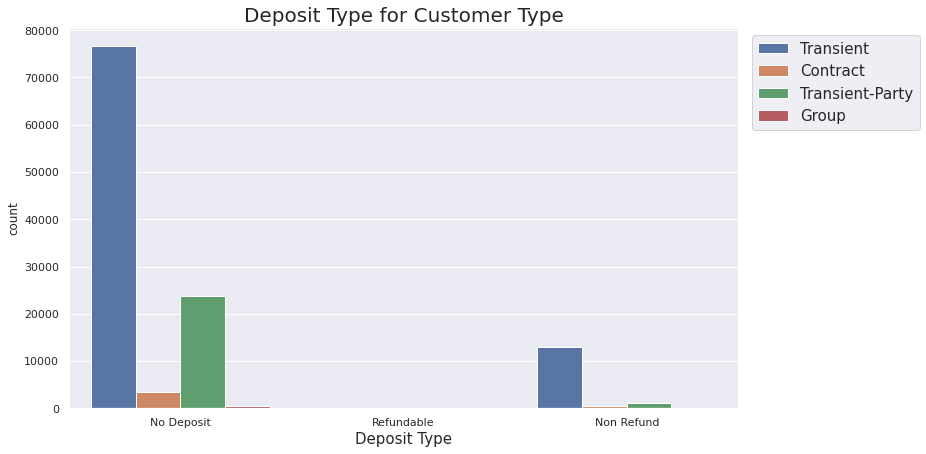

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=Hotel_book_df,x='deposit_type',hue='customer_type')
plt.title('Deposit Type for Customer Type',fontsize=20)
plt.xlabel('Deposit Type',fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1),fontsize=15)

# *Most customer type prefer booking no deposit type. Very less customers booked refundable one. There are no group type customers booked Non-Refund deposit type*

# **REPEATED GUEST**

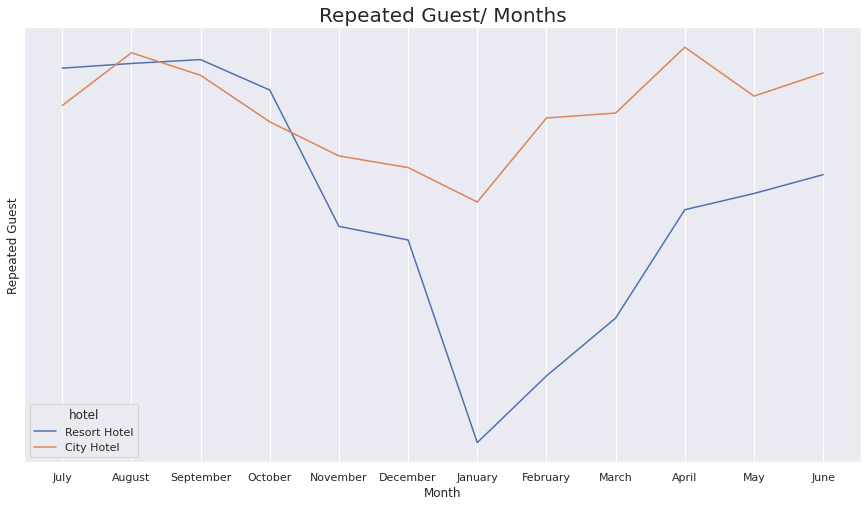

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = "arrival_date_month", y="is_repeated_guest", hue="hotel", data=Hotel_book_df, ci=None).set_title('Repeated Guest/ Months', fontsize=20)
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Repeated Guest', fontsize=12)
plt.show()


Text(0.5, 1.0, ' Repeated Guests / Hotel Type ')

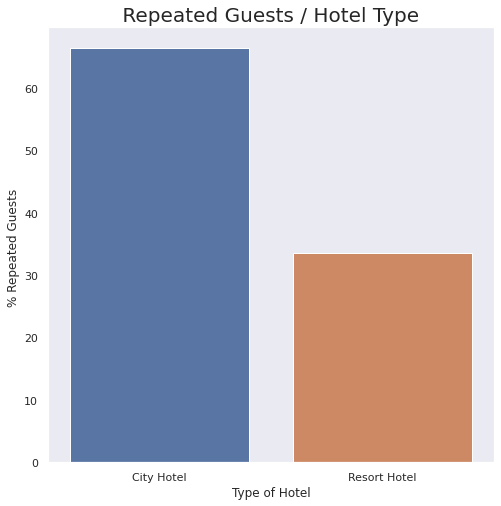

In [ ]:
#distribution of repeated guest hotel wise

series=Hotel_book_df.groupby('hotel')["is_repeated_guest"].count()
hotel_type=series.index
count_percent_repeated_guest=series.values/series.values.sum()*100
plt.figure(figsize=(8,8))
sns.set_theme(style="dark",font='sans-serif')
ax = sns.barplot(x=hotel_type,y=count_percent_repeated_guest)
plt.ylabel("% Repeated Guests ", fontsize=12)
plt.xlabel("Type of Hotel", fontsize=12)
plt.title(" Repeated Guests / Hotel Type ", fontsize=20)

# *City hotel has maximum number of repeated guest as compared to Resort*

# **ADR ANALYSIS**

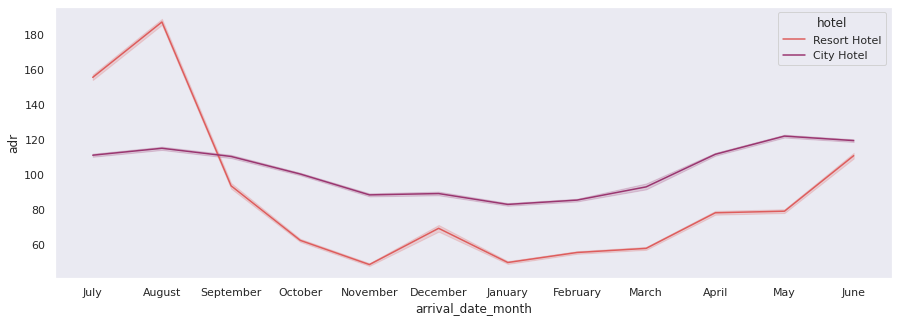

In [ ]:
sns.lineplot(data=Hotel_book_df, x="arrival_date_month", y="adr", hue="hotel",palette='flare')


*#The above plot concludes that the ADR was highest during August and July in the resort hotel. On the other hand, city hotel has maximum ADR was present in May, June, August*

# **CONCLUSION**

•	An overall analysis suggests that the business aspect of the City Hotel venture was much more profitable than that of a Resort one, but if the investor sees potential in the business and was ready to invest more, a Resort Hotel will be a valuable add-on.
•	In the end, we can see that the hotel industry was facing an imminent challenge of rising cancellation rates and a steep decline in the number of bookings from the last few years. So, using the actionable insights would help the marketing manager to better steer the start up in the hotel industry market of this region.

